In [1]:
# Created during May 25 HACKATHON by JD

# Calculates win percentage given on game score for both players.

In [13]:
from copy import deepcopy
import csv
from datetime import date
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

log_folder = 'logs/'
log_file = log_folder + 'log_10m_preendgames.csv'

todays_date = date.today().strftime("%Y%m%d")

In [2]:
win_dict = {}

t0 = time.time()

# because moves are logged chronologically, we can overwrite the entry for each game ID
# for each move until we reach the final move, at which point we know the final state of the game.
with open(log_file,'r') as f:
    moveReader = csv.reader(f)
    next(moveReader)
    
    for i,row in enumerate(moveReader):
        if (i+1)%1000000==0:
            print('Processed {} rows in {} seconds'.format(i+1, time.time()-t0))
            
        if i<10:
            print(row)
                    
        # This flag indicates whether p1 won or not, with 0.5 as the value if the game was tied.
        if row[0]=='p1':
            spread = int(row[6])-int(row[11])
        else:
            spread = int(row[11])-int(row[6])
            
        win_dict[row[1]] = (np.sign(spread)+1)/2

['p2', 'J3DH3KGZPuqMEDDcFXJauQ', '1', 'CEIIORT', '8H TORIC', '20', '20', '5', 'EI', '21.853', '86', '0']
['p1', 'J3DH3KGZPuqMEDDcFXJauQ', '2', 'CDEIIJW', '9G JEW', '36', '36', '3', 'CDII', '33.265', '81', '20']
['p2', 'J3DH3KGZPuqMEDDcFXJauQ', '3', 'EFIMOQT', '10F MOTE', '30', '50', '4', 'FIQ', '21.483', '78', '36']
['p1', 'J3DH3KGZPuqMEDDcFXJauQ', '4', 'ACDHIII', 'L7 A.IDIC', '22', '58', '5', 'HI', '22.994', '74', '50']
['p2', 'J3DH3KGZPuqMEDDcFXJauQ', '5', 'BEFGIOQ', '11C BEFOG', '37', '87', '5', 'IQ', '32.050', '69', '58']
['p2', 'wvTRHqNYEEjCHJiuGDw3WM', '1', 'DEIOSTW', '8D WITED', '26', '26', '5', 'OS', '32.236', '86', '0']
['p1', 'J3DH3KGZPuqMEDDcFXJauQ', '6', 'AHIOORV', '12D HAO', '32', '90', '3', 'IORV', '29.935', '64', '87']
['p1', 'wvTRHqNYEEjCHJiuGDw3WM', '2', 'DENRTWZ', 'E7 W.ZEN', '34', '34', '4', 'DRT', '34.836', '81', '26']
['p2', 'J3DH3KGZPuqMEDDcFXJauQ', '7', 'AINQRTV', 'J10 TRANQ', '45', '132', '5', 'IV', '40.426', '61', '90']
['p2', 'wvTRHqNYEEjCHJiuGDw3WM', '3', 'AB

Can define what spread beyond which you assume player has a 0 or 100% chance of winning - using 300 to start

In [23]:
max_spread = 300
counter_dict_by_spread_and_tiles_remaining = {x:{
    spread:0 for spread in range(max_spread,-max_spread-1,-1)} for x in range(0,94)}
win_counter_dict_by_spread_and_tiles_remaining = deepcopy(counter_dict_by_spread_and_tiles_remaining)

# counter_dict_by_scores = {x:{y:0 for y in range(1000)} for x in range(1000)}
# win_counter_dict_by_scores = deepcopy(counter_dict_by_scores)

In [24]:
t0=time.time()
print('There are {} games'.format(len(win_dict)))

with open(log_file,'r') as f:
    moveReader = csv.reader(f)
    next(moveReader)
    
    for i,row in enumerate(moveReader):
        if (i+1)%1000000==0:
            print('Processed {} rows in {} seconds'.format(i+1, time.time()-t0))

        # truncate spread to the range -max_spread to max_spread
        end_of_turn_spread = min(max(int(row[6])-int(row[11]),-max_spread),max_spread)
        end_of_turn_tiles_left = int(row[10])-int(row[7])
        
        if end_of_turn_tiles_left > 0:
            counter_dict_by_spread_and_tiles_remaining[end_of_turn_tiles_left][end_of_turn_spread] += 1

            if row[0]=='p1':
                win_counter_dict_by_spread_and_tiles_remaining[
                    end_of_turn_tiles_left][end_of_turn_spread] += win_dict[row[1]]
            else:
                win_counter_dict_by_spread_and_tiles_remaining[
                    end_of_turn_tiles_left][end_of_turn_spread] += (1-win_dict[row[1]])
         
        # debug rows
#         if i<10:
#             print(row)
#             print(end_of_turn_spread)
#             print(end_of_turn_tiles_left)
#             print(counter_dict_by_spread_and_tiles_remaining[end_of_turn_tiles_left][end_of_turn_spread])
#             print(win_counter_dict_by_spread_and_tiles_remaining[end_of_turn_tiles_left][end_of_turn_spread])

There are 435135 games
Processed 1000000 rows in 3.857712984085083 seconds
Processed 2000000 rows in 7.840104818344116 seconds
Processed 3000000 rows in 12.049179077148438 seconds
Processed 4000000 rows in 16.178235054016113 seconds
Processed 5000000 rows in 20.38151788711548 seconds
Processed 6000000 rows in 24.441001892089844 seconds
Processed 7000000 rows in 28.841587781906128 seconds
Processed 8000000 rows in 33.4282500743866 seconds
Processed 9000000 rows in 37.76067805290222 seconds


In [25]:
count_df = pd.DataFrame(counter_dict_by_spread_and_tiles_remaining)
win_df = pd.DataFrame(win_counter_dict_by_spread_and_tiles_remaining)
win_pct_df = win_df/count_df

Text(0.5, 1, 'Win % by tiles remaining and spread')

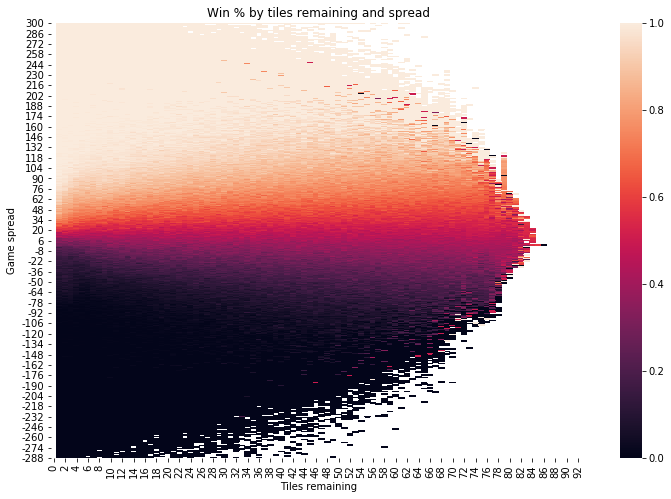

In [28]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(win_pct_df, ax=ax)
ax.set_xlabel('Tiles remaining')
ax.set_ylabel('Game spread')
ax.set_title('Win % by tiles remaining and spread')

In [29]:
plt.savefig('win_pct.jpg')

<Figure size 432x288 with 0 Axes>